# Random Forest Classification

## For classification use

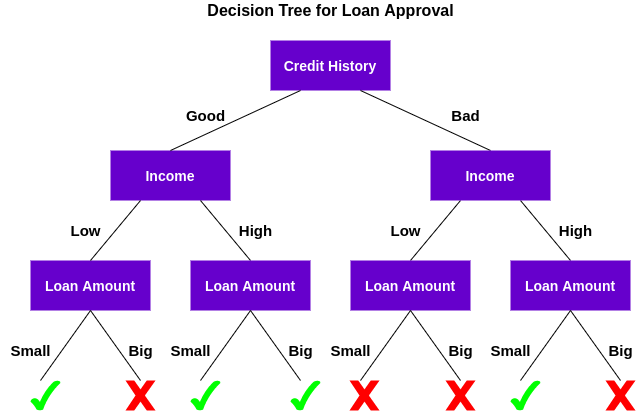

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [126]:
# open file with pd.read_csv
df = pd.read_csv(r"diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6000,0.6270,50,1
1,1,85,66,29,0,26.6000,0.3510,31,0
2,8,183,64,0,0,23.3000,0.6720,32,1
3,1,89,66,23,94,28.1000,0.1670,21,0
4,0,137,40,35,168,43.1000,2.2880,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9000,0.1710,63,0
764,2,122,70,27,0,36.8000,0.3400,27,0
765,5,121,72,23,112,26.2000,0.2450,30,0
766,1,126,60,0,0,30.1000,0.3490,47,1


In [127]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.0000,768.0000,768.0000,768.0000,768.0000,768.0000,768.0000,768.0000,768.0000
mean,3.8451,120.8945,69.1055,20.5365,79.7995,31.9926,0.4719,33.2409,0.3490
std,3.3696,31.9726,19.3558,15.9522,115.2440,7.8842,0.3313,11.7602,0.4770
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0780,21.0000,0.0000
25%,1.0000,99.0000,62.0000,0.0000,0.0000,27.3000,0.2437,24.0000,0.0000
50%,3.0000,117.0000,72.0000,23.0000,30.5000,32.0000,0.3725,29.0000,0.0000
75%,6.0000,140.2500,80.0000,32.0000,127.2500,36.6000,0.6262,41.0000,1.0000
max,17.0000,199.0000,122.0000,99.0000,846.0000,67.1000,2.4200,81.0000,1.0000


In [128]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [129]:
df.corr()['Outcome']

Pregnancies                0.2219
Glucose                    0.4666
BloodPressure              0.0651
SkinThickness              0.0748
Insulin                    0.1305
BMI                        0.2927
DiabetesPedigreeFunction   0.1738
Age                        0.2384
Outcome                    1.0000
Name: Outcome, dtype: float64

In [130]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [131]:
df = df.replace(0, np.mean(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']]))

/Users/personal_mac/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [132]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.0000,768.0000,768.0000,768.0000,768.0000,768.0000,768.0000,768.0000,768.0000
mean,4.4008,121.6816,72.2548,26.6065,118.6602,32.4508,0.4719,33.2409,0.3490
std,2.9842,30.4360,12.1159,9.6312,93.0804,6.8754,0.3313,11.7602,0.4770
min,1.0000,44.0000,24.0000,7.0000,14.0000,18.2000,0.0780,21.0000,0.0000
25%,2.0000,99.7500,64.0000,20.5365,79.7995,27.5000,0.2437,24.0000,0.0000
50%,3.8451,117.0000,72.0000,23.0000,79.7995,32.0000,0.3725,29.0000,0.0000
75%,6.0000,140.2500,80.0000,32.0000,127.2500,36.6000,0.6262,41.0000,1.0000
max,17.0000,199.0000,122.0000,99.0000,846.0000,67.1000,2.4200,81.0000,1.0000


In [133]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [134]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Build Decision Tree classification

In [135]:
from sklearn.tree import DecisionTreeClassifier

In [136]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [137]:
y_pred = dt.predict(X_test)

In [138]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [139]:
confusion_matrix(y_pred, y_test)

array([[109,  30],
       [ 42,  50]])

In [140]:
accuracy_score(y_pred, y_test)

0.6883116883116883

In [141]:
from sklearn.metrics import roc_auc_score


print('AUC Score:', roc_auc_score(y_pred, y_test)*100)

AUC Score: 66.38254613700344


In [142]:
Gini = ((roc_auc_score(y_pred, y_test)*2)-1)*100

Gini

32.76509227400688

## Build Random Forest classification by default

In [143]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [144]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [145]:
y_predRF = rfc.predict(X_test)

In [146]:
confusion_matrix(y_predRF, y_test)

array([[123,  29],
       [ 28,  51]])

In [147]:
accuracy_score(y_predRF, y_test)*100

75.32467532467533

In [148]:
print('AUC Score:', roc_auc_score(y_predRF, y_test)*100)

AUC Score: 72.7390073284477


In [149]:
Gini = ((roc_auc_score(y_predRF, y_test)*2)-1)*100

Gini

45.478014656895404

## Build Random Forest classification with feature importance selection

In [150]:
from sklearn.feature_selection import SelectFromModel

In [151]:
sel = SelectFromModel(RandomForestClassifier())
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [152]:
selected_feat= X_train.columns[(sel.get_support())]
selected_feat

Index(['Glucose', 'BMI', 'Age'], dtype='object')

In [153]:
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Glucose                    0.2711
BMI                        0.1613
Age                        0.1444
DiabetesPedigreeFunction   0.1051
BloodPressure              0.0847
Insulin                    0.0831
SkinThickness              0.0760
Pregnancies                0.0743
dtype: float64

In [154]:
X_train = X_train[['Glucose', 'BMI', 'Age']]

X_test = X_test[['Glucose', 'BMI', 'Age']]

In [155]:
rfc_imp = RandomForestClassifier()
rfc_imp.fit(X_train, y_train)

RandomForestClassifier()

In [156]:
y_pred_imp = rfc_imp.predict(X_test)



# Check accuracy score 

print('Model accuracy score with important features :', accuracy_score(y_test, y_pred_imp)*100)

Model accuracy score with important features : 70.995670995671


In [157]:
from sklearn.metrics import roc_auc_score


print('AUC Score:', roc_auc_score(y_pred_imp, y_test)*100)

AUC Score: 68.01234567901234


In [158]:
Gini = ((roc_auc_score(y_pred_imp, y_test)*2)-1)*100

Gini

36.02469135802468

## Build Random Forest classification with hyperparameter optimization

* the best method to determine the optimal settings is to try many different combinations evaluate the performance of each model

* evaluating each model only on the training set can lead to overfitting.

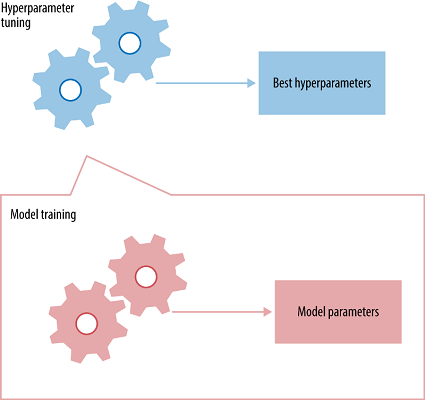

* in order to prevent overfitting during hyperparameter tuning we use cross validation

* Let's fit a model with K = 5. 

* The first iteration we train on the last four folds and evaluate on the 1st. 
* The second time we train on the 1st, 3rd, 4th and 5th fold and evaluate on the 2nd.
* We repeat this procedure 5 times, each time evaluating on a different fold. 

* At the very end of training, we average the performance on each of the folds to come up with final validation metrics for the model.



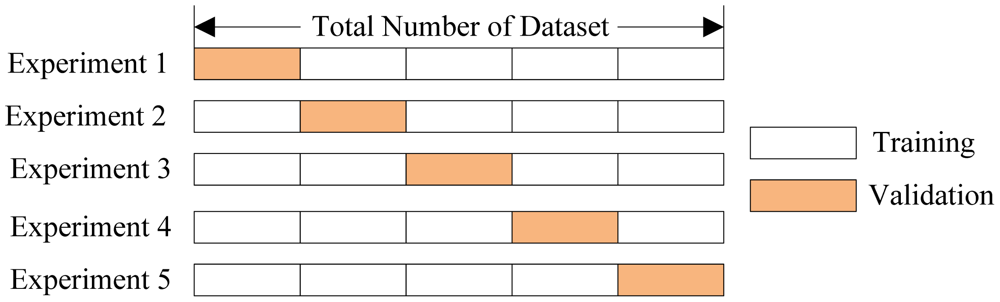

In [159]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]


# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [160]:

# the verbose parameter above will give output updates as the calculations are complete.
# n_jobs = -1 means using all processors

rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=1, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/personal_mac/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
153 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
110 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/personal_mac/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal_mac/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/personal_mac/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_paramet

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=1)

In [161]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 60}

In [162]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    roc_prob = roc_auc_score(y_test, y_prob)
    
    gini_prob = roc_prob*2-1
    
    print('Model Performance')

    print('Gini prob is', gini_prob*100)
    
    return gini_prob

In [163]:
base_model = RandomForestClassifier()
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Gini prob is 57.2682119205298


In [164]:
optimized_model = rf_random.best_estimator_
optmized_accuracy = evaluate(optimized_model, X_test, y_test)


Model Performance
Gini prob is 58.807947019867555


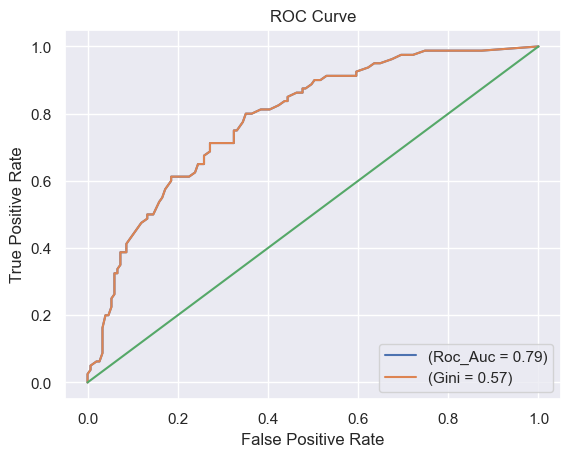

In [165]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = base_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

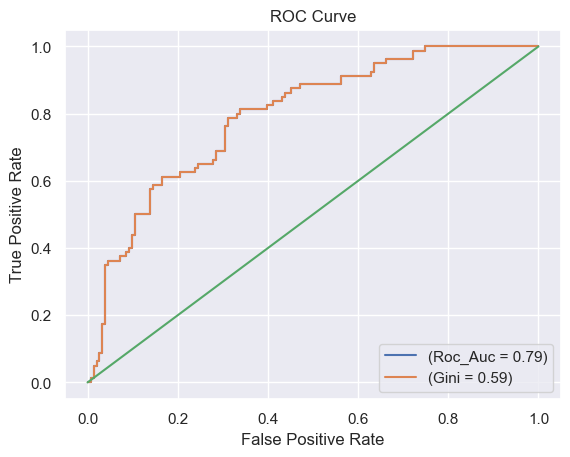

In [166]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = optimized_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

In [167]:
variables = []
train_gini_scores = []
test_gini_scores = []


for i in X_train.columns:
    X_train_single_var = X_train[[i]]
    X_test_single_var = X_test[[i]]

    
    optimized_model.fit(X_train_single_var, y_train)
    
    y_pred_train_single_var = optimized_model.predict_proba(X_train_single_var)[:, 1]

    train_roc = roc_auc_score(y_train, y_pred_train_single_var)
    train_gini = 2 * train_roc - 1

    
    y_pred_test_single_var = optimized_model.predict_proba(X_test_single_var)[:, 1]

    test_roc = roc_auc_score(y_test, y_pred_test_single_var)
    test_gini = 2 * test_roc - 1


    variables.append(i)
    train_gini_scores.append(train_gini)
    test_gini_scores.append(test_gini)


results_df = pd.DataFrame({
                            'Variable': variables,
                            'Train Gini': train_gini_scores,
                            'Test Gini': test_gini_scores
                        })

results_df_sorted = results_df.sort_values(by='Test Gini', ascending=False)

pd.options.display.float_format = '{:.4f}'.format

results_df_sorted


,Variable,Train Gini,Test Gini
0,Glucose,0.7327,0.4137
2,Age,0.5378,0.2664
1,BMI,0.7092,0.2598
